# **Reading Data**

In [112]:
from google.colab import drive
drive.mount('/content/drive',force_remount=True)

Mounted at /content/drive


**Importing Python Libraries and CSV Files**

In [149]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
import time
import pandas.util.testing as tm
from datetime import datetime
from scipy import integrate, optimize
import warnings
warnings.filterwarnings('ignore')

# ML libraries
import lightgbm as lgb
import xgboost as xgb
from xgboost import plot_importance, plot_tree
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn import linear_model
from sklearn.metrics import mean_squared_error
import io
path = '/content/drive/My Drive/SIR Dataset Week 4'
#print(path)
test = pd.read_csv(path+'/test.csv')
train = pd.read_csv(path+'/train.csv')
submission_example = pd.read_csv(path+'/submission.csv')

**Confirmed Cases & Fatalities Province_State Wise**

In [150]:
train['Province_State'].fillna("None", inplace=True)
display(train.head(5))
display(train.describe())
print("Number of Country_Region: ", train['Country_Region'].nunique())
print("Dates go from day", max(train['Date']), "to day", min(train['Date']), ", a total of", train['Date'].nunique(), "days")
print("Countries with Province_State informed: ", train.loc[train['Province_State']!='None']['Country_Region'].unique())

,Id,Province_State,Country_Region,Date,ConfirmedCases,Fatalities
0,1,None,Afghanistan,2020-01-22,0.0,0.0
1,2,None,Afghanistan,2020-01-23,0.0,0.0
2,3,None,Afghanistan,2020-01-24,0.0,0.0
3,4,None,Afghanistan,2020-01-25,0.0,0.0
4,5,None,Afghanistan,2020-01-26,0.0,0.0


,Id,ConfirmedCases,Fatalities
count,35995.000000,35995.000000,35995.000000
mean,17998.000000,3683.508737,243.560217
std,10391.005806,18986.978708,1832.966999
min,1.000000,0.000000,0.000000
25%,8999.500000,0.000000,0.000000
50%,17998.000000,19.000000,0.000000
75%,26996.500000,543.000000,7.000000
max,35995.000000,345813.000000,33998.000000


Number of Country_Region:  184
Dates go from day 2020-05-15 to day 2020-01-22 , a total of 115 days
Countries with Province_State informed:  ['Australia' 'Canada' 'China' 'Denmark' 'France' 'Netherlands' 'US'
 'United Kingdom']


# **Data Visualisation**

**Global Confirmed & Deceased cases**

Text(0.5, 0, 'Date')

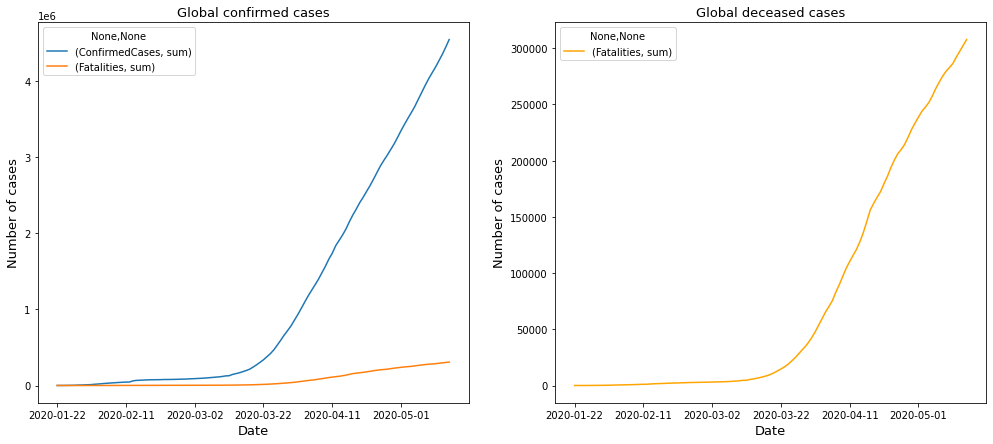

In [151]:
#confirmed_country = train.groupby(['Country_Region', 'Province_State']).agg({'ConfirmedCases':['sum']})
#fatalities_country = train.groupby(['Country_Region', 'Province_State']).agg({'Fatalities':['sum']})
confirmed_total_date = train.groupby(['Date']).agg({'ConfirmedCases':['sum']})
fatalities_total_date = train.groupby(['Date']).agg({'Fatalities':['sum']})
total_date = confirmed_total_date.join(fatalities_total_date)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(17,7))
total_date.plot(ax=ax1)
ax1.set_title("Global confirmed cases", size=13)
ax1.set_ylabel("Number of cases", size=13)
ax1.set_xlabel("Date", size=13)
fatalities_total_date.plot(ax=ax2, color='orange')
ax2.set_title("Global deceased cases", size=13)
ax2.set_ylabel("Number of cases", size=13)
ax2.set_xlabel("Date", size=13)

**Global Confirmed & Deceased Cases(excluding China)**

Text(0.5, 0, 'Date')

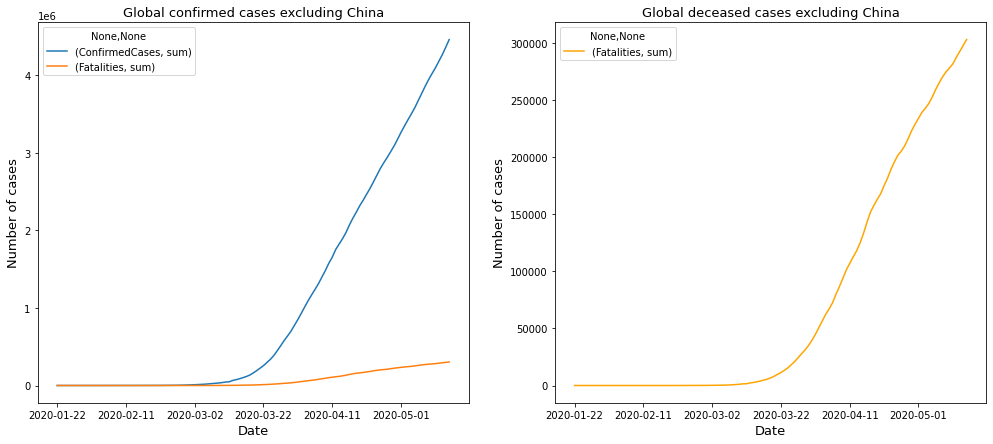

In [152]:

#confirmed_country_noChina = train[train['Country_Region']!='China'].groupby(['Country_Region', 'Province_State']).agg({'ConfirmedCases':['sum']})
#fatalities_country_noChina = train[train['Country_Region']!='China'].groupby(['Country_Region', 'Province_State']).agg({'Fatalities':['sum']})
confirmed_total_date_noChina = train[train['Country_Region']!='China'].groupby(['Date']).agg({'ConfirmedCases':['sum']})
fatalities_total_date_noChina = train[train['Country_Region']!='China'].groupby(['Date']).agg({'Fatalities':['sum']})
total_date_noChina = confirmed_total_date_noChina.join(fatalities_total_date_noChina)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(17,7))
total_date_noChina.plot(ax=ax1)
ax1.set_title("Global confirmed cases excluding China", size=13)
ax1.set_ylabel("Number of cases", size=13)
ax1.set_xlabel("Date", size=13)
fatalities_total_date_noChina.plot(ax=ax2, color='orange')
ax2.set_title("Global deceased cases excluding China", size=13)
ax2.set_ylabel("Number of cases", size=13)
ax2.set_xlabel("Date", size=13)

**Confirmed & Deceased Cases in China**

Text(0.5, 0, 'Date')

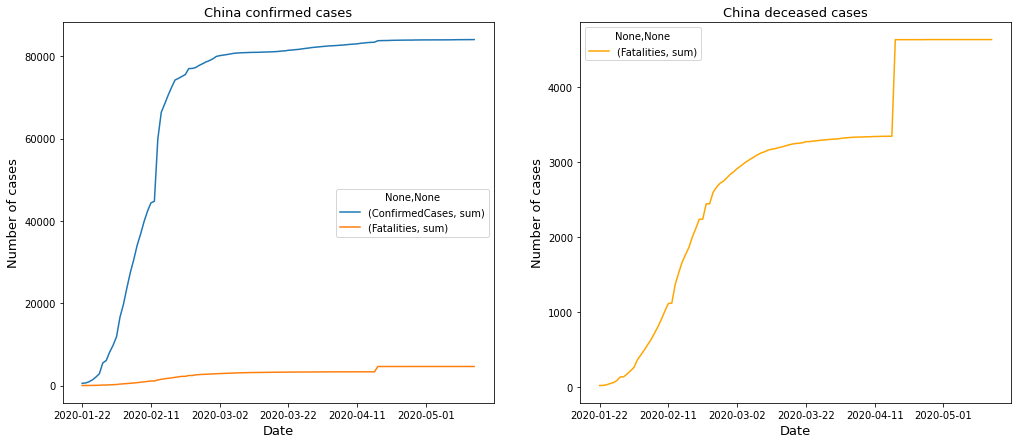

In [153]:
#confirmed_country_China = train[train['Country_Region']=='China'].groupby(['Country_Region', 'Province_State']).agg({'ConfirmedCases':['sum']})
#fatalities_country_China = train[train['Country_Region']=='China'].groupby(['Country_Region', 'Province_State']).agg({'Fatalities':['sum']})
confirmed_total_date_China = train[train['Country_Region']=='China'].groupby(['Date']).agg({'ConfirmedCases':['sum']})
fatalities_total_date_China = train[train['Country_Region']=='China'].groupby(['Date']).agg({'Fatalities':['sum']})
total_date_China = confirmed_total_date_China.join(fatalities_total_date_China)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(17,7))
total_date_China.plot(ax=ax1)
ax1.set_title("China confirmed cases", size=13)
ax1.set_ylabel("Number of cases", size=13)
ax1.set_xlabel("Date", size=13)
fatalities_total_date_China.plot(ax=ax2, color='orange')
ax2.set_title("China deceased cases", size=13)
ax2.set_ylabel("Number of cases", size=13)
ax2.set_xlabel("Date", size=13)

**Confirmed Cases & Fatalities(by date) in different Countries**

*   Italy
*   Spain
*   United Kingdom
*   Singapore




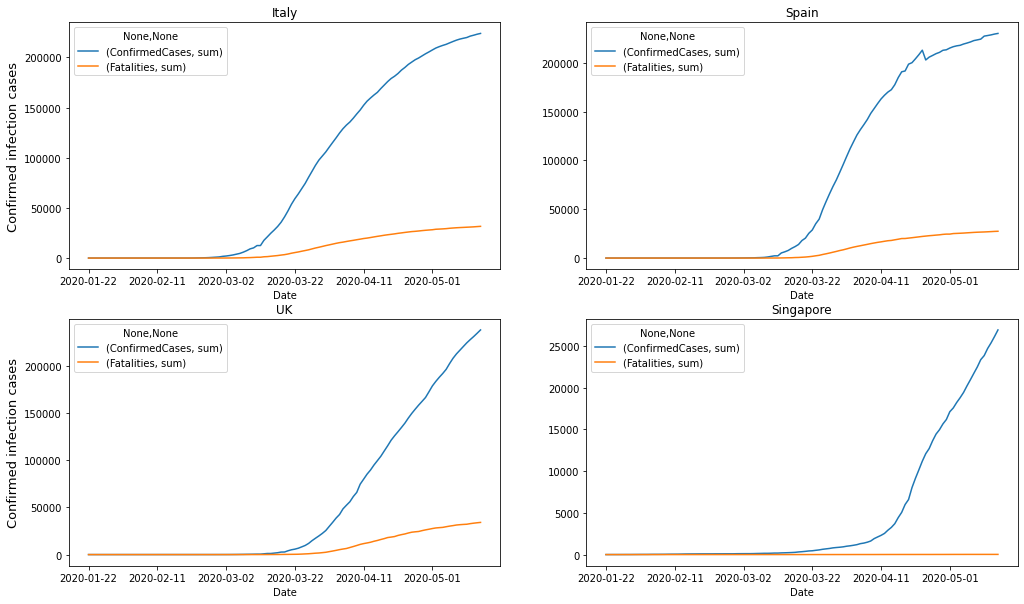

In [154]:
confirmed_total_date_Italy = train[train['Country_Region']=='Italy'].groupby(['Date']).agg({'ConfirmedCases':['sum']})
fatalities_total_date_Italy = train[train['Country_Region']=='Italy'].groupby(['Date']).agg({'Fatalities':['sum']})
total_date_Italy = confirmed_total_date_Italy.join(fatalities_total_date_Italy)

confirmed_total_date_Spain = train[train['Country_Region']=='Spain'].groupby(['Date']).agg({'ConfirmedCases':['sum']})
fatalities_total_date_Spain = train[train['Country_Region']=='Spain'].groupby(['Date']).agg({'Fatalities':['sum']})
total_date_Spain = confirmed_total_date_Spain.join(fatalities_total_date_Spain)

confirmed_total_date_UK = train[train['Country_Region']=='United Kingdom'].groupby(['Date']).agg({'ConfirmedCases':['sum']})
fatalities_total_date_UK = train[train['Country_Region']=='United Kingdom'].groupby(['Date']).agg({'Fatalities':['sum']})
total_date_UK = confirmed_total_date_UK.join(fatalities_total_date_UK)

confirmed_total_date_Singapore = train[train['Country_Region']=='Singapore'].groupby(['Date']).agg({'ConfirmedCases':['sum']})
fatalities_total_date_Singapore = train[train['Country_Region']=='Singapore'].groupby(['Date']).agg({'Fatalities':['sum']})
total_date_Singapore = confirmed_total_date_Singapore.join(fatalities_total_date_Singapore)

plt.figure(figsize=(17,10))
plt.subplot(2, 2, 1)
total_date_Italy.plot(ax=plt.gca(), title='Italy')
plt.ylabel("Confirmed infection cases", size=13)

plt.subplot(2, 2, 2)
total_date_Spain.plot(ax=plt.gca(), title='Spain')

plt.subplot(2, 2, 3)
total_date_UK.plot(ax=plt.gca(), title='UK')
plt.ylabel("Confirmed infection cases", size=13)

plt.subplot(2, 2, 4)
total_date_Singapore.plot(ax=plt.gca(), title='Singapore')

**Confirmed Cases & Fatalities(by date) in different Countries**

*   Russia
*   Brazil
*   India
*   United States




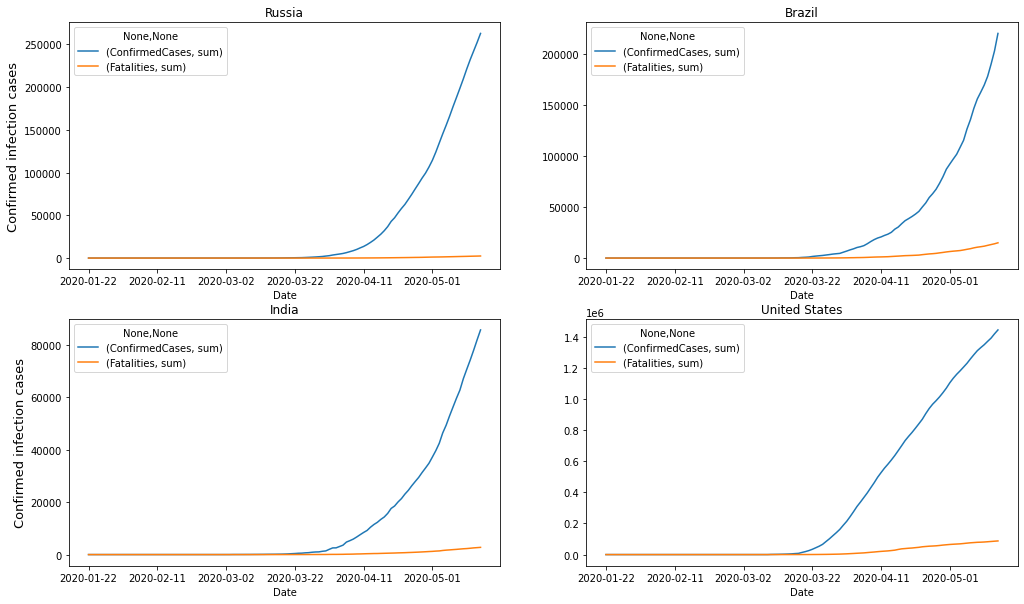

In [155]:
confirmed_total_date_Russia = train[train['Country_Region']=='Russia'].groupby(['Date']).agg({'ConfirmedCases':['sum']})
fatalities_total_date_Russia = train[train['Country_Region']=='Russia'].groupby(['Date']).agg({'Fatalities':['sum']})
total_date_Russia = confirmed_total_date_Russia.join(fatalities_total_date_Russia)

confirmed_total_date_Brazil = train[train['Country_Region']=='Brazil'].groupby(['Date']).agg({'ConfirmedCases':['sum']})
fatalities_total_date_Brazil = train[train['Country_Region']=='Brazil'].groupby(['Date']).agg({'Fatalities':['sum']})
total_date_Brazil = confirmed_total_date_Brazil.join(fatalities_total_date_Brazil)

confirmed_total_date_India = train[train['Country_Region']=='India'].groupby(['Date']).agg({'ConfirmedCases':['sum']})
fatalities_total_date_India = train[train['Country_Region']=='India'].groupby(['Date']).agg({'Fatalities':['sum']})
total_date_India = confirmed_total_date_India.join(fatalities_total_date_India)

confirmed_total_date_US = train[train['Country_Region']=='US'].groupby(['Date']).agg({'ConfirmedCases':['sum']})
fatalities_total_date_US = train[train['Country_Region']=='US'].groupby(['Date']).agg({'Fatalities':['sum']})
total_date_US = confirmed_total_date_US.join(fatalities_total_date_US)

plt.figure(figsize=(17,10))
plt.subplot(2, 2, 1)
total_date_Russia.plot(ax=plt.gca(), title='Russia')
plt.ylabel("Confirmed infection cases", size=13)

plt.subplot(2, 2, 2)
total_date_Brazil.plot(ax=plt.gca(), title='Brazil')

plt.subplot(2, 2, 3)
total_date_India.plot(ax=plt.gca(), title='India')
plt.ylabel("Confirmed infection cases", size=13)

plt.subplot(2, 2, 4)
total_date_US.plot(ax=plt.gca(), title='United States')

**Fraction of Population Infected in different Countries**
*   Italy
*   Spain
*   United Kingdom
*   Singapore




(0.0, 0.05)

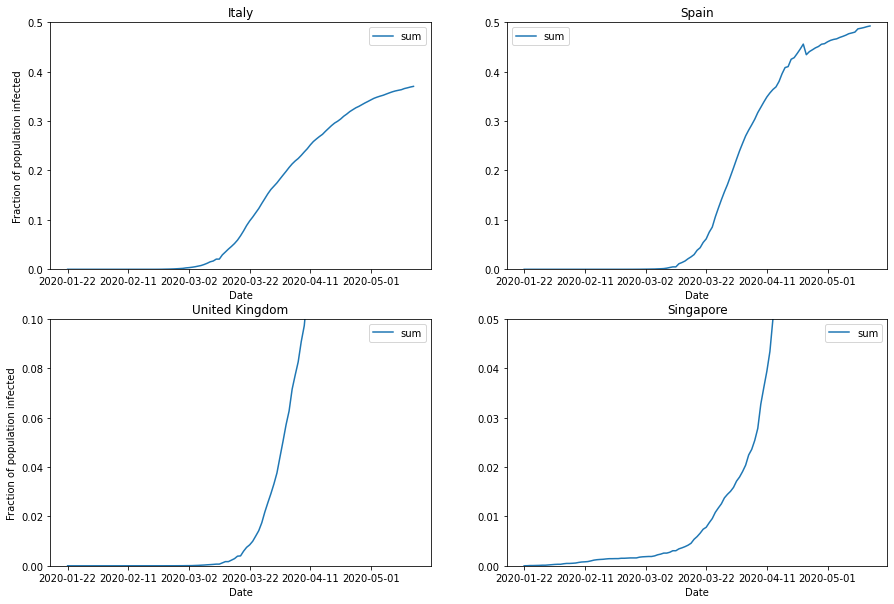

In [156]:
pop_italy = 60486683.
pop_spain = 46749696.
pop_UK = 67784927.
pop_singapore = 5837230.

total_date_Italy.ConfirmedCases = total_date_Italy.ConfirmedCases/pop_italy*100.
total_date_Italy.Fatalities = total_date_Italy.ConfirmedCases/pop_italy*100.
total_date_Spain.ConfirmedCases = total_date_Spain.ConfirmedCases/pop_spain*100.
total_date_Spain.Fatalities = total_date_Spain.ConfirmedCases/pop_spain*100.
total_date_UK.ConfirmedCases = total_date_UK.ConfirmedCases/pop_UK*100.
total_date_UK.Fatalities = total_date_UK.ConfirmedCases/pop_UK*100.
total_date_Singapore.ConfirmedCases = total_date_Singapore.ConfirmedCases/pop_singapore*100.
total_date_Singapore.Fatalities = total_date_Singapore.ConfirmedCases/pop_singapore*100.

plt.figure(figsize=(15,10))
plt.subplot(2, 2, 1)
total_date_Italy.ConfirmedCases.plot(ax=plt.gca(), title='Italy')
plt.ylabel("Fraction of population infected")
plt.ylim(0, 0.5)

plt.subplot(2, 2, 2)
total_date_Spain.ConfirmedCases.plot(ax=plt.gca(), title='Spain')
plt.ylim(0, 0.5)

plt.subplot(2, 2, 3)
total_date_UK.ConfirmedCases.plot(ax=plt.gca(), title='United Kingdom')
plt.ylabel("Fraction of population infected")
plt.ylim(0, 0.1)

plt.subplot(2, 2, 4)
total_date_Singapore.ConfirmedCases.plot(ax=plt.gca(), title='Singapore')
plt.ylim(0, 0.05)


**Fraction of Population Infected in different Countries**
*   Russia
*   Brazil
*   India
*   United States




(0.0, 0.05)

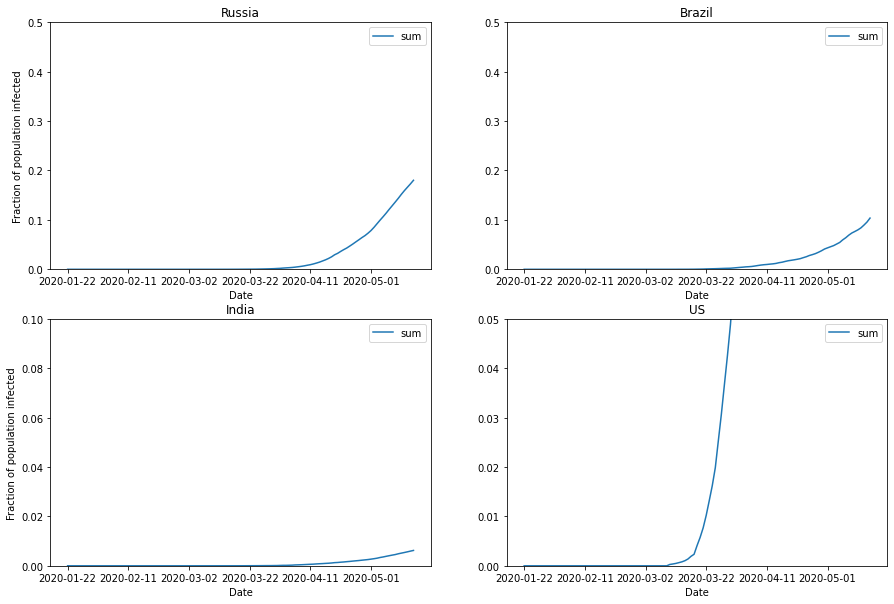

In [157]:
pop_russia = 145930871.
pop_brazil = 212559417.
pop_india = 1380004385.
pop_us = 331002651.

total_date_Russia.ConfirmedCases = total_date_Russia.ConfirmedCases/pop_russia*100.
total_date_Russia.Fatalities = total_date_Russia.ConfirmedCases/pop_russia*100.
total_date_Brazil.ConfirmedCases = total_date_Brazil.ConfirmedCases/pop_brazil*100.
total_date_Brazil.Fatalities = total_date_Brazil.ConfirmedCases/pop_brazil*100.
total_date_India.ConfirmedCases = total_date_India.ConfirmedCases/pop_india*100.
total_date_India.Fatalities = total_date_India.ConfirmedCases/pop_india*100.
total_date_US.ConfirmedCases = total_date_US.ConfirmedCases/pop_us*100.
total_date_US.Fatalities = total_date_US.ConfirmedCases/pop_us*100.

plt.figure(figsize=(15,10))
plt.subplot(2, 2, 1)
total_date_Russia.ConfirmedCases.plot(ax=plt.gca(), title='Russia')
plt.ylabel("Fraction of population infected")
plt.ylim(0, 0.5)

plt.subplot(2, 2, 2)
total_date_Brazil.ConfirmedCases.plot(ax=plt.gca(), title='Brazil')
plt.ylim(0, 0.5)

plt.subplot(2, 2, 3)
total_date_India.ConfirmedCases.plot(ax=plt.gca(), title='India')
plt.ylabel("Fraction of population infected")
plt.ylim(0, 0.1)

plt.subplot(2, 2, 4)
total_date_US.ConfirmedCases.plot(ax=plt.gca(), title='US')
plt.ylim(0, 0.05)


**Number of infected people Vs Number of Days : For different countries**

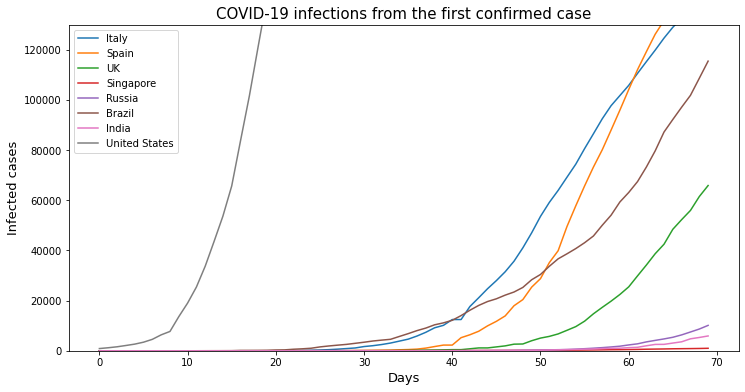

In [158]:
confirmed_total_date_Italy = train[(train['Country_Region']=='Italy') & train['ConfirmedCases']!=0].groupby(['Date']).agg({'ConfirmedCases':['sum']})
fatalities_total_date_Italy = train[(train['Country_Region']=='Italy') & train['ConfirmedCases']!=0].groupby(['Date']).agg({'Fatalities':['sum']})
total_date_Italy = confirmed_total_date_Italy.join(fatalities_total_date_Italy)

confirmed_total_date_Spain = train[(train['Country_Region']=='Spain') & (train['ConfirmedCases']!=0)].groupby(['Date']).agg({'ConfirmedCases':['sum']})
fatalities_total_date_Spain = train[(train['Country_Region']=='Spain') & (train['ConfirmedCases']!=0)].groupby(['Date']).agg({'Fatalities':['sum']})
total_date_Spain = confirmed_total_date_Spain.join(fatalities_total_date_Spain)

confirmed_total_date_UK = train[(train['Country_Region']=='United Kingdom') & (train['ConfirmedCases']!=0)].groupby(['Date']).agg({'ConfirmedCases':['sum']})
fatalities_total_date_UK = train[(train['Country_Region']=='United Kingdom') & (train['ConfirmedCases']!=0)].groupby(['Date']).agg({'Fatalities':['sum']})
total_date_UK = confirmed_total_date_UK.join(fatalities_total_date_UK)

confirmed_total_date_Singapore = train[(train['Country_Region']=='Singapore') & (train['ConfirmedCases']!=0)].groupby(['Date']).agg({'ConfirmedCases':['sum']})
fatalities_total_date_Singapore = train[(train['Country_Region']=='Singapore') & (train['ConfirmedCases']!=0)].groupby(['Date']).agg({'Fatalities':['sum']})
total_date_Singapore = confirmed_total_date_Singapore.join(fatalities_total_date_Singapore)

confirmed_total_date_Russia = train[(train['Country_Region']=='Russia') & train['ConfirmedCases']!=0].groupby(['Date']).agg({'ConfirmedCases':['sum']})
fatalities_total_date_Russia = train[(train['Country_Region']=='Russia') & train['ConfirmedCases']!=0].groupby(['Date']).agg({'Fatalities':['sum']})
total_date_Russia = confirmed_total_date_Russia.join(fatalities_total_date_Russia)

confirmed_total_date_Brazil = train[(train['Country_Region']=='Brazil') & (train['ConfirmedCases']!=0)].groupby(['Date']).agg({'ConfirmedCases':['sum']})
fatalities_total_date_Brazil = train[(train['Country_Region']=='Brazil') & (train['ConfirmedCases']!=0)].groupby(['Date']).agg({'Fatalities':['sum']})
total_date_Brazil = confirmed_total_date_Brazil.join(fatalities_total_date_Brazil)

confirmed_total_date_India = train[(train['Country_Region']=='India') & (train['ConfirmedCases']!=0)].groupby(['Date']).agg({'ConfirmedCases':['sum']})
fatalities_total_date_India = train[(train['Country_Region']=='India') & (train['ConfirmedCases']!=0)].groupby(['Date']).agg({'Fatalities':['sum']})
total_date_India = confirmed_total_date_India.join(fatalities_total_date_India)

confirmed_total_date_US = train[(train['Country_Region']=='US') & (train['ConfirmedCases']!=0)].groupby(['Date']).agg({'ConfirmedCases':['sum']})
fatalities_total_date_US = train[(train['Country_Region']=='US') & (train['ConfirmedCases']!=0)].groupby(['Date']).agg({'Fatalities':['sum']})
total_date_US = confirmed_total_date_US.join(fatalities_total_date_US)

italy = [i for i in total_date_Italy.ConfirmedCases['sum'].values]
italy_30 = italy[0:70] 
spain = [i for i in total_date_Spain.ConfirmedCases['sum'].values]
spain_30 = spain[0:70] 
UK = [i for i in total_date_UK.ConfirmedCases['sum'].values]
UK_30 = UK[0:70] 
singapore = [i for i in total_date_Singapore.ConfirmedCases['sum'].values]
singapore_30 = singapore[0:70]

russia = [i for i in total_date_Russia.ConfirmedCases['sum'].values]
russia_30 = russia[0:70] 
brazil = [i for i in total_date_Brazil.ConfirmedCases['sum'].values]
brazil_30 = brazil[0:70] 
india = [i for i in total_date_India.ConfirmedCases['sum'].values]
india_30 = india[0:70] 
us = [i for i in total_date_US.ConfirmedCases['sum'].values]
us_30 = us[0:70]


# Plots
plt.figure(figsize=(12,6))
plt.plot(italy_30)
plt.plot(spain_30)
plt.plot(UK_30)
plt.plot(singapore_30)
plt.plot(russia_30)
plt.plot(brazil_30)
plt.plot(india_30)
plt.plot(us_30)
plt.legend(["Italy", "Spain", "UK", "Singapore","Russia","Brazil","India","United States"], loc='upper left')
plt.title("COVID-19 infections from the first confirmed case", size=15)
plt.xlabel("Days", size=13)
plt.ylabel("Infected cases", size=13)
plt.ylim(0, 130000)
plt.show()

# **SIR Implementation**

In [159]:

# Susceptible equation
def fa(N, a, b, beta):
    fa = -beta*a*b
    return fa

# Infected equation
def fb(N, a, b, beta, gamma):
    fb = beta*a*b - gamma*b
    return fb

# Recovered/deceased equation
def fc(N, b, gamma):
    fc = gamma*b
    return fc

**Runge Kutta Method**

In [160]:
# Runge-Kutta method of 4rth order for 3 dimensions (susceptible a, infected b and recovered r)
def rK4(N, a, b, c, fa, fb, fc, beta, gamma, hs):
    a1 = fa(N, a, b, beta)*hs
    b1 = fb(N, a, b, beta, gamma)*hs
    c1 = fc(N, b, gamma)*hs
    ak = a + a1*0.5
    bk = b + b1*0.5
    ck = c + c1*0.5
    a2 = fa(N, ak, bk, beta)*hs
    b2 = fb(N, ak, bk, beta, gamma)*hs
    c2 = fc(N, bk, gamma)*hs
    ak = a + a2*0.5
    bk = b + b2*0.5
    ck = c + c2*0.5
    a3 = fa(N, ak, bk, beta)*hs
    b3 = fb(N, ak, bk, beta, gamma)*hs
    c3 = fc(N, bk, gamma)*hs
    ak = a + a3
    bk = b + b3
    ck = c + c3
    a4 = fa(N, ak, bk, beta)*hs
    b4 = fb(N, ak, bk, beta, gamma)*hs
    c4 = fc(N, bk, gamma)*hs
    a = a + (a1 + 2*(a2 + a3) + a4)/6
    b = b + (b1 + 2*(b2 + b3) + b4)/6
    c = c + (c1 + 2*(c2 + c3) + c4)/6
    return a, b, c

**SIR Function which returns number of  suspected, infected and recovered cases**

In [161]:
def SIR(N, b0, beta, gamma, hs):
    
    """
    N = total number of population
    beta = transition rate S->I
    gamma = transition rate I->R
    k =  denotes the constant degree distribution of the network (average value for networks in which 
    the probability of finding a node with a different connectivity decays exponentially fast
    hs = jump step of the numerical integration
    """
    
    # Initial condition
    a = float(N-1)/N -b0
    b = float(1)/N +b0
    c = 0.

    sus, inf, rec= [],[],[]
    for i in range(10000): # Run for a certain number of time-steps
        sus.append(a)
        inf.append(b)
        rec.append(c)
        a,b,c = rK4(N, a, b, c, fa, fb, fc, beta, gamma, hs)

    return sus, inf, rec

**Parameters taken for our SIR Model**

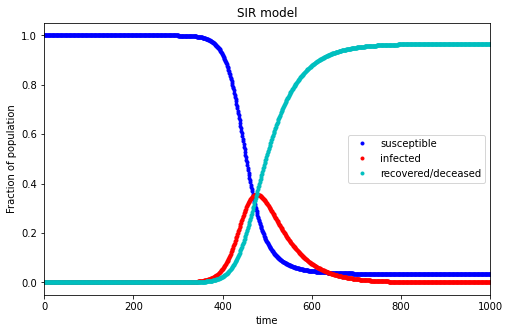

In [162]:
# Parameters of the model
N = 7800*(10**6)
b0 = 0
beta = 0.7
gamma = 0.2
hs = 0.1

sus, inf, rec = SIR(N, b0, beta, gamma, hs)

f = plt.figure(figsize=(8,5)) 
plt.plot(sus, 'b.', label='susceptible');
plt.plot(inf, 'r.', label='infected');
plt.plot(rec, 'c.', label='recovered/deceased');
plt.title("SIR model")
plt.xlabel("time", fontsize=10);
plt.ylabel("Fraction of population", fontsize=10);
plt.legend(loc='best')
plt.xlim(0,1000)
plt.savefig('SIR_example.png')
plt.show()

**Fitting our SIR Model for the Spain**

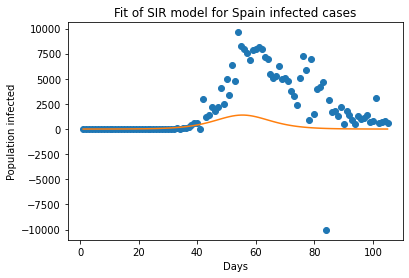

Optimal parameters: beta = 20.57444327524175  and gamma =  20.41594029511819


In [163]:
population = float(46750238)
country_df = pd.DataFrame()
country_df['ConfirmedCases'] = train.loc[train['Country_Region']=='Spain'].ConfirmedCases.diff().fillna(0)
country_df = country_df[10:]
country_df['day_count'] = list(range(1,len(country_df)+1))

ydata = [i for i in country_df.ConfirmedCases]
xdata = country_df.day_count
ydata = np.array(ydata, dtype=float)
xdata = np.array(xdata, dtype=float)

N = population
inf0 = ydata[0]
sus0 = N - inf0
rec0 = 0.0

def sir_model(y, x, beta, gamma):
    sus = -beta * y[0] * y[1] / N
    rec = gamma * y[1]
    inf = -(sus + rec)
    return sus, inf, rec

def fit_odeint(x, beta, gamma):
    return integrate.odeint(sir_model, (sus0, inf0, rec0), x, args=(beta, gamma))[:,1]

popt, pcov = optimize.curve_fit(fit_odeint, xdata, ydata)
fitted = fit_odeint(xdata, *popt)

plt.plot(xdata, ydata, 'o')
plt.plot(xdata, fitted)
plt.title("Fit of SIR model for Spain infected cases")
plt.ylabel("Population infected")
plt.xlabel("Days")
plt.show()
print("Optimal parameters: beta =", popt[0], " and gamma = ", popt[1])

# **Data enrichment**

**Join data**



In [164]:
# Merge train and test, exclude overlap
dates_overlap = ['2020-04-01', '2020-04-02', '2020-04-03', '2020-04-04', '2020-04-05', '2020-04-06', '2020-04-07', '2020-04-08',
                 '2020-04-09', '2020-04-10', '2020-04-11', '2020-04-12', '2020-04-13', '2020-04-14']
train2 = train.loc[~train['Date'].isin(dates_overlap)]
all_data = pd.concat([train2, test], axis = 0, sort=False)

# Double check that there are no informed ConfirmedCases and Fatalities after 2020-03-11
all_data.loc[all_data['Date'] >= '2020-04-01', 'ConfirmedCases'] = 0
all_data.loc[all_data['Date'] >= '2020-04-01', 'Fatalities'] = 0
all_data['Date'] = pd.to_datetime(all_data['Date'])

# Create date columns
le = preprocessing.LabelEncoder()
all_data['Day_num'] = le.fit_transform(all_data.Date)
all_data['Day'] = all_data['Date'].dt.day
all_data['Month'] = all_data['Date'].dt.month
all_data['Year'] = all_data['Date'].dt.year

# Fill null values given that we merged train-test datasets
all_data['Province_State'].fillna("None", inplace=True)
all_data['ConfirmedCases'].fillna(0, inplace=True)
all_data['Fatalities'].fillna(0, inplace=True)
all_data['Id'].fillna(-1, inplace=True)
all_data['ForecastId'].fillna(-1, inplace=True)

display(all_data)
display(all_data.loc[all_data['Date'] == '2020-04-01'])


,Id,Province_State,Country_Region,Date,ConfirmedCases,Fatalities,ForecastId,Day_num,Day,Month,Year
0,1.0,None,Afghanistan,2020-01-22,0.0,0.0,-1.0,0,22,1,2020
1,2.0,None,Afghanistan,2020-01-23,0.0,0.0,-1.0,1,23,1,2020
2,3.0,None,Afghanistan,2020-01-24,0.0,0.0,-1.0,2,24,1,2020
3,4.0,None,Afghanistan,2020-01-25,0.0,0.0,-1.0,3,25,1,2020
4,5.0,None,Afghanistan,2020-01-26,0.0,0.0,-1.0,4,26,1,2020
...,...,...,...,...,...,...,...,...,...,...,...
13454,-1.0,None,Zimbabwe,2020-05-10,0.0,0.0,13455.0,108,10,5,2020
13455,-1.0,None,Zimbabwe,2020-05-11,0.0,0.0,13456.0,109,11,5,2020
13456,-1.0,None,Zimbabwe,2020-05-12,0.0,0.0,13457.0,110,12,5,2020
13457,-1.0,None,Zimbabwe,2020-05-13,0.0,0.0,13458.0,111,13,5,2020


,Id,Province_State,Country_Region,Date,ConfirmedCases,Fatalities,ForecastId,Day_num,Day,Month,Year


**Check for missing values**

In [165]:
missings_count = {col:all_data[col].isnull().sum() for col in all_data.columns}
missings = pd.DataFrame.from_dict(missings_count, orient='index')
print(missings.nlargest(30, 0))


                0
Id              0
Province_State  0
Country_Region  0
Date            0
ConfirmedCases  0
Fatalities      0
ForecastId      0
Day_num         0
Day             0
Month           0
Year            0


**Lags and trends**

In [166]:
def calculate_lag(df, lag_list, column):
    for lag in lag_list:
        column_lag = column + "_" + str(lag)
        df[column_lag] = df.groupby(['Country_Region', 'Province_State'])[column].shift(lag, fill_value=0)
    return df

def calculate_trend(df, lag_list, column):
    for lag in lag_list:
        trend_column_lag = "Trend_" + column + "_" + str(lag)
        df[trend_column_lag] = (df.groupby(['Country_Region', 'Province_State'])[column].shift(0, fill_value=0) - 
                                df.groupby(['Country_Region', 'Province_State'])[column].shift(lag, fill_value=0))/df.groupby(['Country_Region', 'Province_State'])[column].shift(lag, fill_value=0.001)
    return df


ts = time.time()
all_data = calculate_lag(all_data.reset_index(), range(1,7), 'ConfirmedCases')
all_data = calculate_lag(all_data, range(1,7), 'Fatalities')
all_data = calculate_trend(all_data, range(1,7), 'ConfirmedCases')
all_data = calculate_trend(all_data, range(1,7), 'Fatalities')
all_data.replace([np.inf, -np.inf], 0, inplace=True)
all_data.fillna(0, inplace=True)
print("Time spent: ", time.time()-ts)

Time spent:  4.194877862930298


**Lag/trend fo Spain**

In [167]:
all_data[all_data['Country_Region']=='Spain'].iloc[40:50][['Id', 'Province_State', 'Country_Region', 'Date',
       'ConfirmedCases', 'Fatalities', 'ForecastId', 'Day_num', 'ConfirmedCases_1',
       'ConfirmedCases_2', 'ConfirmedCases_3', 'Fatalities_1', 'Fatalities_2',
       'Fatalities_3']]

,Id,Province_State,Country_Region,Date,ConfirmedCases,Fatalities,ForecastId,Day_num,ConfirmedCases_1,ConfirmedCases_2,ConfirmedCases_3,Fatalities_1,Fatalities_2,Fatalities_3
22462,25571.0,None,Spain,2020-03-02,120.0,0.0,-1.0,40,84.0,45.0,32.0,0.0,0.0,0.0
22463,25572.0,None,Spain,2020-03-03,165.0,1.0,-1.0,41,120.0,84.0,45.0,0.0,0.0,0.0
22464,25573.0,None,Spain,2020-03-04,222.0,2.0,-1.0,42,165.0,120.0,84.0,1.0,0.0,0.0
22465,25574.0,None,Spain,2020-03-05,259.0,3.0,-1.0,43,222.0,165.0,120.0,2.0,1.0,0.0
22466,25575.0,None,Spain,2020-03-06,400.0,5.0,-1.0,44,259.0,222.0,165.0,3.0,2.0,1.0
22467,25576.0,None,Spain,2020-03-07,500.0,10.0,-1.0,45,400.0,259.0,222.0,5.0,3.0,2.0
22468,25577.0,None,Spain,2020-03-08,673.0,17.0,-1.0,46,500.0,400.0,259.0,10.0,5.0,3.0
22469,25578.0,None,Spain,2020-03-09,1073.0,28.0,-1.0,47,673.0,500.0,400.0,17.0,10.0,5.0
22470,25579.0,None,Spain,2020-03-10,1695.0,35.0,-1.0,48,1073.0,673.0,500.0,28.0,17.0,10.0
22471,25580.0,None,Spain,2020-03-11,2277.0,54.0,-1.0,49,1695.0,1073.0,673.0,35.0,28.0,17.0


**Lag/trend for India**

In [168]:
all_data[all_data['Country_Region']=='India'].iloc[40:50][['Id', 'Province_State', 'Country_Region', 'Date',
       'ConfirmedCases', 'Fatalities', 'ForecastId', 'Day_num', 'ConfirmedCases_1',
       'ConfirmedCases_2', 'ConfirmedCases_3', 'Fatalities_1', 'Fatalities_2',
       'Fatalities_3']]

,Id,Province_State,Country_Region,Date,ConfirmedCases,Fatalities,ForecastId,Day_num,ConfirmedCases_1,ConfirmedCases_2,ConfirmedCases_3,Fatalities_1,Fatalities_2,Fatalities_3
14180,16141.0,None,India,2020-03-02,5.0,0.0,-1.0,40,3.0,3.0,3.0,0.0,0.0,0.0
14181,16142.0,None,India,2020-03-03,5.0,0.0,-1.0,41,5.0,3.0,3.0,0.0,0.0,0.0
14182,16143.0,None,India,2020-03-04,28.0,0.0,-1.0,42,5.0,5.0,3.0,0.0,0.0,0.0
14183,16144.0,None,India,2020-03-05,30.0,0.0,-1.0,43,28.0,5.0,5.0,0.0,0.0,0.0
14184,16145.0,None,India,2020-03-06,31.0,0.0,-1.0,44,30.0,28.0,5.0,0.0,0.0,0.0
14185,16146.0,None,India,2020-03-07,34.0,0.0,-1.0,45,31.0,30.0,28.0,0.0,0.0,0.0
14186,16147.0,None,India,2020-03-08,39.0,0.0,-1.0,46,34.0,31.0,30.0,0.0,0.0,0.0
14187,16148.0,None,India,2020-03-09,43.0,0.0,-1.0,47,39.0,34.0,31.0,0.0,0.0,0.0
14188,16149.0,None,India,2020-03-10,56.0,0.0,-1.0,48,43.0,39.0,34.0,0.0,0.0,0.0
14189,16150.0,None,India,2020-03-11,62.0,1.0,-1.0,49,56.0,43.0,39.0,0.0,0.0,0.0


**Add country details & cleaning dataset**

In [169]:
# Load countries data file
world_population = pd.read_csv(path+"/population_by_country_2020.csv")

# Select desired columns and rename some of them
world_population = world_population[['Country (or dependency)', 'Population (2020)', 'Density (P/Km²)', 'Land Area (Km²)', 'Med. Age', 'Urban Pop %']]
world_population.columns = ['Country (or dependency)', 'Population (2020)', 'Density', 'Land Area', 'Med Age', 'Urban Pop']

# Replace United States by US
world_population.loc[world_population['Country (or dependency)']=='United States', 'Country (or dependency)'] = 'US'

# Remove the % character from Urban Pop values
world_population['Urban Pop'] = world_population['Urban Pop'].str.rstrip('%')

# Replace Urban Pop and Med Age "N.A" by their respective modes, then transform to int
world_population.loc[world_population['Urban Pop']=='N.A.', 'Urban Pop'] = int(world_population.loc[world_population['Urban Pop']!='N.A.', 'Urban Pop'].mode()[0])
world_population['Urban Pop'] = world_population['Urban Pop'].astype('int16')
world_population.loc[world_population['Med Age']=='N.A.', 'Med Age'] = int(world_population.loc[world_population['Med Age']!='N.A.', 'Med Age'].mode()[0])
world_population['Med Age'] = world_population['Med Age'].astype('int16')

print("Cleaned country details dataset")
display(world_population)

# Now join the dataset to our previous DataFrame and clean missings (not match in left join)- label encode cities
print("Joined dataset")
all_data = all_data.merge(world_population, left_on='Country_Region', right_on='Country (or dependency)', how='left')
all_data[['Population (2020)', 'Density', 'Land Area', 'Med Age', 'Urban Pop']] = all_data[['Population (2020)', 'Density', 'Land Area', 'Med Age', 'Urban Pop']].fillna(0)
display(all_data)

print("Encoded dataset")
# Label encode countries and provinces. Save dictionary for exploration purposes
all_data.drop('Country (or dependency)', inplace=True, axis=1)
all_data['Country_Region'] = le.fit_transform(all_data['Country_Region'])
number_c = all_data['Country_Region']
countries = le.inverse_transform(all_data['Country_Region'])
country_dict = dict(zip(countries, number_c)) 
all_data['Province_State'] = le.fit_transform(all_data['Province_State'])
number_p = all_data['Province_State']
province = le.inverse_transform(all_data['Province_State'])
province_dict = dict(zip(province, number_p)) 
display(all_data)

Cleaned country details dataset


,Country (or dependency),Population (2020),Density,Land Area,Med Age,Urban Pop
0,China,1438207241,153,9388211,38,61
1,India,1377233523,464,2973190,28,35
2,US,330610570,36,9147420,38,83
3,Indonesia,272931713,151,1811570,30,56
4,Pakistan,219992900,287,770880,23,35
...,...,...,...,...,...,...
230,Montserrat,4991,50,100,19,10
231,Falkland Islands,3458,0,12170,19,66
232,Niue,1624,6,260,19,46
233,Tokelau,1354,136,10,19,0


Joined dataset


,index,Id,Province_State,Country_Region,Date,ConfirmedCases,Fatalities,ForecastId,Day_num,Day,Month,Year,ConfirmedCases_1,ConfirmedCases_2,ConfirmedCases_3,ConfirmedCases_4,ConfirmedCases_5,ConfirmedCases_6,Fatalities_1,Fatalities_2,Fatalities_3,Fatalities_4,Fatalities_5,Fatalities_6,Trend_ConfirmedCases_1,Trend_ConfirmedCases_2,Trend_ConfirmedCases_3,Trend_ConfirmedCases_4,Trend_ConfirmedCases_5,Trend_ConfirmedCases_6,Trend_Fatalities_1,Trend_Fatalities_2,Trend_Fatalities_3,Trend_Fatalities_4,Trend_Fatalities_5,Trend_Fatalities_6,Country (or dependency),Population (2020),Density,Land Area,Med Age,Urban Pop
0,0,1.0,None,Afghanistan,2020-01-22,0.0,0.0,-1.0,0,22,1,2020,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Afghanistan,38742911.0,60.0,652860.0,18.0,25.0
1,1,2.0,None,Afghanistan,2020-01-23,0.0,0.0,-1.0,1,23,1,2020,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Afghanistan,38742911.0,60.0,652860.0,18.0,25.0
2,2,3.0,None,Afghanistan,2020-01-24,0.0,0.0,-1.0,2,24,1,2020,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Afghanistan,38742911.0,60.0,652860.0,18.0,25.0
3,3,4.0,None,Afghanistan,2020-01-25,0.0,0.0,-1.0,3,25,1,2020,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Afghanistan,38742911.0,60.0,652860.0,18.0,25.0
4,4,5.0,None,Afghanistan,2020-01-26,0.0,0.0,-1.0,4,26,1,2020,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Afghanistan,38742911.0,60.0,652860.0,18.0,25.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45067,13454,-1.0,None,Zimbabwe,2020-05-10,0.0,0.0,13455.0,108,10,5,2020,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Zimbabwe,14818157.0,38.0,386850.0,19.0,38.0
45068,13455,-1.0,None,Zimbabwe,2020-05-11,0.0,0.0,13456.0,109,11,5,2020,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Zimbabwe,14818157.0,38.0,386850.0,19.0,38.0
45069,13456,-1.0,None,Zimbabwe,2020-05-12,0.0,0.0,13457.0,110,12,5,2020,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Zimbabwe,14818157.0,38.0,386850.0,19.0,38.0
45070,13457,-1.0,None,Zimbabwe,2020-05-13,0.0,0.0,13458.0,111,13,5,2020,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Zimbabwe,14818157.0,38.0,386850.0,19.0,38.0


Encoded dataset


,index,Id,Province_State,Country_Region,Date,ConfirmedCases,Fatalities,ForecastId,Day_num,Day,Month,Year,ConfirmedCases_1,ConfirmedCases_2,ConfirmedCases_3,ConfirmedCases_4,ConfirmedCases_5,ConfirmedCases_6,Fatalities_1,Fatalities_2,Fatalities_3,Fatalities_4,Fatalities_5,Fatalities_6,Trend_ConfirmedCases_1,Trend_ConfirmedCases_2,Trend_ConfirmedCases_3,Trend_ConfirmedCases_4,Trend_ConfirmedCases_5,Trend_ConfirmedCases_6,Trend_Fatalities_1,Trend_Fatalities_2,Trend_Fatalities_3,Trend_Fatalities_4,Trend_Fatalities_5,Trend_Fatalities_6,Population (2020),Density,Land Area,Med Age,Urban Pop
0,0,1.0,83,0,2020-01-22,0.0,0.0,-1.0,0,22,1,2020,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,38742911.0,60.0,652860.0,18.0,25.0
1,1,2.0,83,0,2020-01-23,0.0,0.0,-1.0,1,23,1,2020,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,38742911.0,60.0,652860.0,18.0,25.0
2,2,3.0,83,0,2020-01-24,0.0,0.0,-1.0,2,24,1,2020,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,38742911.0,60.0,652860.0,18.0,25.0
3,3,4.0,83,0,2020-01-25,0.0,0.0,-1.0,3,25,1,2020,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,38742911.0,60.0,652860.0,18.0,25.0
4,4,5.0,83,0,2020-01-26,0.0,0.0,-1.0,4,26,1,2020,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,38742911.0,60.0,652860.0,18.0,25.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45067,13454,-1.0,83,183,2020-05-10,0.0,0.0,13455.0,108,10,5,2020,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,14818157.0,38.0,386850.0,19.0,38.0
45068,13455,-1.0,83,183,2020-05-11,0.0,0.0,13456.0,109,11,5,2020,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,14818157.0,38.0,386850.0,19.0,38.0
45069,13456,-1.0,83,183,2020-05-12,0.0,0.0,13457.0,110,12,5,2020,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,14818157.0,38.0,386850.0,19.0,38.0
45070,13457,-1.0,83,183,2020-05-13,0.0,0.0,13458.0,111,13,5,2020,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,14818157.0,38.0,386850.0,19.0,38.0


# **Prediction for early stages**


*   **Using Linear Regression**



**For Spain**

Text(0, 0.5, 'Log ConfirmedCases')

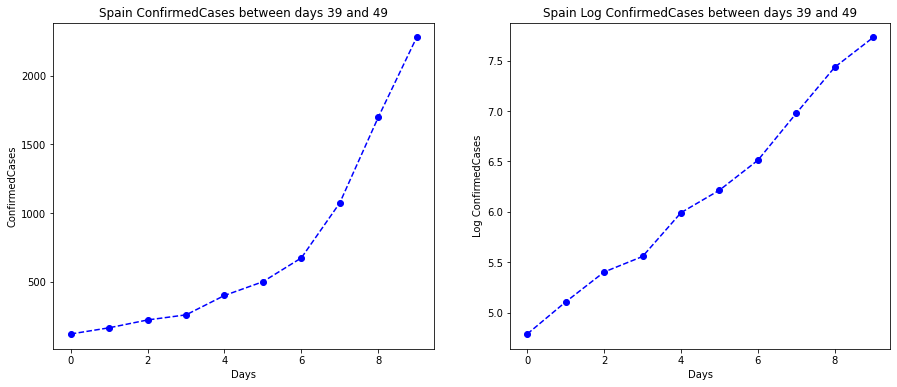

In [170]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15,6))

# Day_num = 38 is March 1st
y1 = all_data[(all_data['Country_Region']==country_dict['Spain']) & (all_data['Day_num']>39) & (all_data['Day_num']<=49)][['ConfirmedCases']]
x1 = range(0, len(y1))
ax1.plot(x1, y1, 'bo--')
ax1.set_title("Spain ConfirmedCases between days 39 and 49")
ax1.set_xlabel("Days")
ax1.set_ylabel("ConfirmedCases")

y2 = all_data[(all_data['Country_Region']==country_dict['Spain']) & (all_data['Day_num']>39) & (all_data['Day_num']<=49)][['ConfirmedCases']].apply(lambda x: np.log(x))
x2 = range(0, len(y2))
ax2.plot(x2, y2, 'bo--')
ax2.set_title("Spain Log ConfirmedCases between days 39 and 49")
ax2.set_xlabel("Days")
ax2.set_ylabel("Log ConfirmedCases")


**For India**

Text(0, 0.5, 'Log ConfirmedCases')

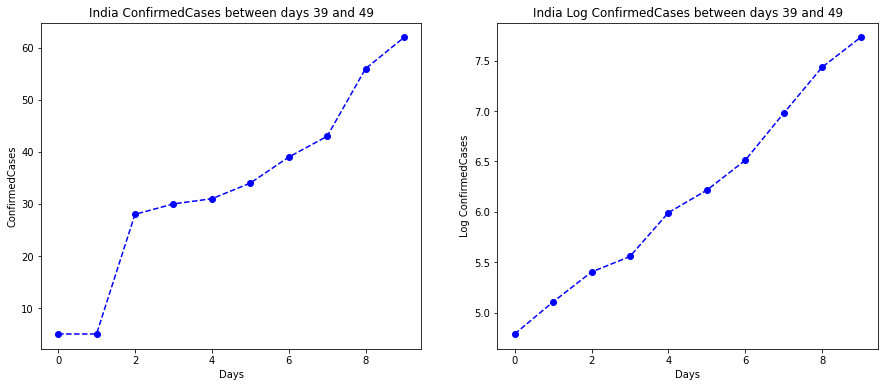

In [171]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15,6))

# Day_num = 38 is March 1st
y1 = all_data[(all_data['Country_Region']==country_dict['India']) & (all_data['Day_num']>39) & (all_data['Day_num']<=49)][['ConfirmedCases']]
x1 = range(0, len(y1))
ax1.plot(x1, y1, 'bo--')
ax1.set_title("India ConfirmedCases between days 39 and 49")
ax1.set_xlabel("Days")
ax1.set_ylabel("ConfirmedCases")

y2 = all_data[(all_data['Country_Region']==country_dict['Spain']) & (all_data['Day_num']>39) & (all_data['Day_num']<=49)][['ConfirmedCases']].apply(lambda x: np.log(x))
x2 = range(0, len(y2))
ax2.plot(x2, y2, 'bo--')
ax2.set_title("India Log ConfirmedCases between days 39 and 49")
ax2.set_xlabel("Days")
ax2.set_ylabel("Log ConfirmedCases")



*   Filtering selected features
*   Linear Regression Model
*   Submission Function

**Filtering Selected Features**

In [172]:
# Filter selected features
data = all_data.copy()
features = ['Id', 'ForecastId', 'Country_Region', 'Province_State', 'ConfirmedCases', 'Fatalities', 
       'Day_num']
data = data[features]

# Apply log transformation to all ConfirmedCases and Fatalities columns, except for trends
data[['ConfirmedCases', 'Fatalities']] = data[['ConfirmedCases', 'Fatalities']].astype('float64')
data[['ConfirmedCases', 'Fatalities']] = data[['ConfirmedCases', 'Fatalities']].apply(lambda x: np.log1p(x))

# Replace infinites
data.replace([np.inf, -np.inf], 0, inplace=True)


# Split data into train/test
def split_data(df, train_lim, test_lim):
    
    df.loc[df['Day_num']<=train_lim , 'ForecastId'] = -1
    df = df[df['Day_num']<=test_lim]
    
    # Train set
    x_train = df[df.ForecastId == -1].drop(['ConfirmedCases', 'Fatalities'], axis=1)
    y_train_1 = df[df.ForecastId == -1]['ConfirmedCases']
    y_train_2 = df[df.ForecastId == -1]['Fatalities']

    # Test set
    x_test = df[df.ForecastId != -1].drop(['ConfirmedCases', 'Fatalities'], axis=1)

    # Clean Id columns and keep ForecastId as index
    x_train.drop('Id', inplace=True, errors='ignore', axis=1)
    x_train.drop('ForecastId', inplace=True, errors='ignore', axis=1)
    x_test.drop('Id', inplace=True, errors='ignore', axis=1)
    x_test.drop('ForecastId', inplace=True, errors='ignore', axis=1)
    
    return x_train, y_train_1, y_train_2, x_test


# Linear regression model
def lin_reg(X_train, Y_train, X_test):
    # Create linear regression object
    regr = linear_model.LinearRegression()

    # Train the model using the training sets
    regr.fit(X_train, Y_train)

    # Make predictions using the testing set
    y_pred = regr.predict(X_test)
    
    return regr, y_pred


# Submission function
def get_submission(df, target1, target2):
    
    prediction_1 = df[target1]
    prediction_2 = df[target2]

    # Submit predictions
    prediction_1 = [int(item) for item in list(map(round, prediction_1))]
    prediction_2 = [int(item) for item in list(map(round, prediction_2))]
    
    submission = pd.DataFrame({
        "ForecastId": df['ForecastId'].astype('int32'), 
        "ConfirmedCases": prediction_1, 
        "Fatalities": prediction_2
    })
    submission.to_csv('submission.csv', index=False)

**Spain**

In [173]:
# Select train (real) data from March 1 to last day updated
#
dates_list = ['2020-03-01', '2020-03-02', '2020-03-03', '2020-03-04', '2020-03-05', '2020-03-06', '2020-03-07', '2020-03-08', '2020-03-09', 
                 '2020-03-10', '2020-03-11','2020-03-12','2020-03-13','2020-03-14','2020-03-15','2020-03-16','2020-03-17','2020-03-18',
                 '2020-03-19','2020-03-20','2020-03-21','2020-03-22','2020-03-23', '2020-03-24', '2020-03-25', '2020-03-26', '2020-03-27', 
                 '2020-03-28', '2020-03-29', '2020-03-30', '2020-03-31', '2020-04-01', '2020-04-02', '2020-04-03', '2020-04-04', '2020-04-05', 
               '2020-04-06', '2020-04-07', '2020-04-08', '2020-04-09', '2020-04-10', '2020-04-11', '2020-04-12', '2020-04-13', '2020-04-14',
              '2020-04-15','2020-04-16','2020-04-17','2020-04-18','2020-04-19','2020-04-20','2020-04-21','2020-04-22','2020-04-23','2020-04-24',
              '2020-04-25','2020-04-26','2020-04-27','2020-04-28','2020-04-29','2020-04-30','2020-05-01','2020-05-02','2020-05-03','2020-05-04',
              '2020-05-05','2020-05-06','2020-05-07','2020-05-08','2020-05-09','2020-05-10','2020-05-11','2020-05-12','2020-05-13','2020-04-14']

In [174]:
all_data.loc[all_data['Country_Region']==country_dict['Spain']][50:70]

,index,Id,Province_State,Country_Region,Date,ConfirmedCases,Fatalities,ForecastId,Day_num,Day,Month,Year,ConfirmedCases_1,ConfirmedCases_2,ConfirmedCases_3,ConfirmedCases_4,ConfirmedCases_5,ConfirmedCases_6,Fatalities_1,Fatalities_2,Fatalities_3,Fatalities_4,Fatalities_5,Fatalities_6,Trend_ConfirmedCases_1,Trend_ConfirmedCases_2,Trend_ConfirmedCases_3,Trend_ConfirmedCases_4,Trend_ConfirmedCases_5,Trend_ConfirmedCases_6,Trend_Fatalities_1,Trend_Fatalities_2,Trend_Fatalities_3,Trend_Fatalities_4,Trend_Fatalities_5,Trend_Fatalities_6,Population (2020),Density,Land Area,Med Age,Urban Pop
22472,25580,25581.0,83,156,2020-03-12,2277.0,55.0,-1.0,50,12,3,2020,2277.0,1695.0,1073.0,673.0,500.0,400.0,54.0,35.0,28.0,17.0,10.0,5.0,0.000000,0.343363,1.122088,2.383358,3.554000,4.692500,0.018519,0.571429,0.964286,2.235294,4.500000,10.000000,46751175.0,94.0,498800.0,45.0,80.0
22473,25581,25582.0,83,156,2020-03-13,5232.0,133.0,-1.0,51,13,3,2020,2277.0,2277.0,1695.0,1073.0,673.0,500.0,55.0,54.0,35.0,28.0,17.0,10.0,1.297760,1.297760,2.086726,3.876048,6.774146,9.464000,1.418182,1.462963,2.800000,3.750000,6.823529,12.300000,46751175.0,94.0,498800.0,45.0,80.0
22474,25582,25583.0,83,156,2020-03-14,6391.0,195.0,-1.0,52,14,3,2020,5232.0,2277.0,2277.0,1695.0,1073.0,673.0,133.0,55.0,54.0,35.0,28.0,17.0,0.221521,1.806763,1.806763,2.770501,4.956198,8.496285,0.466165,2.545455,2.611111,4.571429,5.964286,10.470588,46751175.0,94.0,498800.0,45.0,80.0
22475,25583,25584.0,83,156,2020-03-15,7798.0,289.0,-1.0,53,15,3,2020,6391.0,5232.0,2277.0,2277.0,1695.0,1073.0,195.0,133.0,55.0,54.0,35.0,28.0,0.220153,0.490443,2.424682,2.424682,3.600590,6.267474,0.482051,1.172932,4.254545,4.351852,7.257143,9.321429,46751175.0,94.0,498800.0,45.0,80.0
22476,25584,25585.0,83,156,2020-03-16,9942.0,342.0,-1.0,54,16,3,2020,7798.0,6391.0,5232.0,2277.0,2277.0,1695.0,289.0,195.0,133.0,55.0,54.0,35.0,0.274942,0.555625,0.900229,3.366271,3.366271,4.865487,0.183391,0.753846,1.571429,5.218182,5.333333,8.771429,46751175.0,94.0,498800.0,45.0,80.0
22477,25585,25586.0,83,156,2020-03-17,11748.0,533.0,-1.0,55,17,3,2020,9942.0,7798.0,6391.0,5232.0,2277.0,2277.0,342.0,289.0,195.0,133.0,55.0,54.0,0.181654,0.506540,0.838210,1.245413,4.159420,4.159420,0.558480,0.844291,1.733333,3.007519,8.690909,8.870370,46751175.0,94.0,498800.0,45.0,80.0
22478,25586,25587.0,83,156,2020-03-18,13910.0,623.0,-1.0,56,18,3,2020,11748.0,9942.0,7798.0,6391.0,5232.0,2277.0,533.0,342.0,289.0,195.0,133.0,55.0,0.184031,0.399115,0.783791,1.176498,1.658639,5.108915,0.168856,0.821637,1.155709,2.194872,3.684211,10.327273,46751175.0,94.0,498800.0,45.0,80.0
22479,25587,25588.0,83,156,2020-03-19,17963.0,830.0,-1.0,57,19,3,2020,13910.0,11748.0,9942.0,7798.0,6391.0,5232.0,623.0,533.0,342.0,289.0,195.0,133.0,0.291373,0.529026,0.806779,1.303539,1.810671,2.433295,0.332263,0.557223,1.426901,1.871972,3.256410,5.240602,46751175.0,94.0,498800.0,45.0,80.0
22480,25588,25589.0,83,156,2020-03-20,20410.0,1043.0,-1.0,58,20,3,2020,17963.0,13910.0,11748.0,9942.0,7798.0,6391.0,830.0,623.0,533.0,342.0,289.0,195.0,0.136224,0.467290,0.737317,1.052907,1.617338,2.193553,0.256627,0.674157,0.956848,2.049708,2.608997,4.348718,46751175.0,94.0,498800.0,45.0,80.0
22481,25589,25590.0,83,156,2020-03-21,25374.0,1375.0,-1.0,59,21,3,2020,20410.0,17963.0,13910.0,11748.0,9942.0,7798.0,1043.0,830.0,623.0,533.0,342.0,289.0,0.243214,0.412570,0.824155,1.159857,1.552203,2.253911,0.318313,0.656627,1.207063,1.579737,3.020468,3.757785,46751175.0,94.0,498800.0,45.0,80.0


**India**

In [175]:
all_data.loc[all_data['Country_Region']==country_dict['India']][50:70]

,index,Id,Province_State,Country_Region,Date,ConfirmedCases,Fatalities,ForecastId,Day_num,Day,Month,Year,ConfirmedCases_1,ConfirmedCases_2,ConfirmedCases_3,ConfirmedCases_4,ConfirmedCases_5,ConfirmedCases_6,Fatalities_1,Fatalities_2,Fatalities_3,Fatalities_4,Fatalities_5,Fatalities_6,Trend_ConfirmedCases_1,Trend_ConfirmedCases_2,Trend_ConfirmedCases_3,Trend_ConfirmedCases_4,Trend_ConfirmedCases_5,Trend_ConfirmedCases_6,Trend_Fatalities_1,Trend_Fatalities_2,Trend_Fatalities_3,Trend_Fatalities_4,Trend_Fatalities_5,Trend_Fatalities_6,Population (2020),Density,Land Area,Med Age,Urban Pop
14190,16150,16151.0,83,78,2020-03-12,73.0,1.0,-1.0,50,12,3,2020,62.0,56.0,43.0,39.0,34.0,31.0,1.0,0.0,0.0,0.0,0.0,0.0,0.177419,0.303571,0.697674,0.871795,1.147059,1.354839,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.377234e+09,464.0,2973190.0,28.0,35.0
14191,16151,16152.0,83,78,2020-03-13,82.0,2.0,-1.0,51,13,3,2020,73.0,62.0,56.0,43.0,39.0,34.0,1.0,1.0,0.0,0.0,0.0,0.0,0.123288,0.322581,0.464286,0.906977,1.102564,1.411765,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.377234e+09,464.0,2973190.0,28.0,35.0
14192,16152,16153.0,83,78,2020-03-14,102.0,2.0,-1.0,52,14,3,2020,82.0,73.0,62.0,56.0,43.0,39.0,2.0,1.0,1.0,0.0,0.0,0.0,0.243902,0.397260,0.645161,0.821429,1.372093,1.615385,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.377234e+09,464.0,2973190.0,28.0,35.0
14193,16153,16154.0,83,78,2020-03-15,113.0,2.0,-1.0,53,15,3,2020,102.0,82.0,73.0,62.0,56.0,43.0,2.0,2.0,1.0,1.0,0.0,0.0,0.107843,0.378049,0.547945,0.822581,1.017857,1.627907,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,1.377234e+09,464.0,2973190.0,28.0,35.0
14194,16154,16155.0,83,78,2020-03-16,119.0,2.0,-1.0,54,16,3,2020,113.0,102.0,82.0,73.0,62.0,56.0,2.0,2.0,2.0,1.0,1.0,0.0,0.053097,0.166667,0.451220,0.630137,0.919355,1.125000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.377234e+09,464.0,2973190.0,28.0,35.0
14195,16155,16156.0,83,78,2020-03-17,142.0,3.0,-1.0,55,17,3,2020,119.0,113.0,102.0,82.0,73.0,62.0,2.0,2.0,2.0,2.0,1.0,1.0,0.193277,0.256637,0.392157,0.731707,0.945205,1.290323,0.500000,0.500000,0.500000,0.500000,2.000000,2.000000,1.377234e+09,464.0,2973190.0,28.0,35.0
14196,16156,16157.0,83,78,2020-03-18,156.0,3.0,-1.0,56,18,3,2020,142.0,119.0,113.0,102.0,82.0,73.0,3.0,2.0,2.0,2.0,2.0,1.0,0.098592,0.310924,0.380531,0.529412,0.902439,1.136986,0.000000,0.500000,0.500000,0.500000,0.500000,2.000000,1.377234e+09,464.0,2973190.0,28.0,35.0
14197,16157,16158.0,83,78,2020-03-19,194.0,4.0,-1.0,57,19,3,2020,156.0,142.0,119.0,113.0,102.0,82.0,3.0,3.0,2.0,2.0,2.0,2.0,0.243590,0.366197,0.630252,0.716814,0.901961,1.365854,0.333333,0.333333,1.000000,1.000000,1.000000,1.000000,1.377234e+09,464.0,2973190.0,28.0,35.0
14198,16158,16159.0,83,78,2020-03-20,244.0,5.0,-1.0,58,20,3,2020,194.0,156.0,142.0,119.0,113.0,102.0,4.0,3.0,3.0,2.0,2.0,2.0,0.257732,0.564103,0.718310,1.050420,1.159292,1.392157,0.250000,0.666667,0.666667,1.500000,1.500000,1.500000,1.377234e+09,464.0,2973190.0,28.0,35.0
14199,16159,16160.0,83,78,2020-03-21,330.0,4.0,-1.0,59,21,3,2020,244.0,194.0,156.0,142.0,119.0,113.0,5.0,4.0,3.0,3.0,2.0,2.0,0.352459,0.701031,1.115385,1.323944,1.773109,1.920354,-0.200000,0.000000,0.333333,0.333333,1.000000,1.000000,1.377234e+09,464.0,2973190.0,28.0,35.0


**Linear Regression for all countries**

In [176]:
ts = time.time()

def linreg_basic_all_countries(data, day_start, train_lim, test_lim):
    
    data2 = data.loc[data.Day_num >= day_start]

    # Set the dataframe where we will update the predictions
    data_pred = data[data.ForecastId != -1][['Country_Region', 'Province_State', 'Day_num', 'ForecastId']]
    data_pred = data_pred.loc[data_pred['Day_num']>=day_start]
    data_pred['Predicted_ConfirmedCases'] = [0]*len(data_pred)
    data_pred['Predicted_Fatalities'] = [0]*len(data_pred)

    print("Currently running Linear Regression for all countries")

    # Main loop for countries
    for c in data2['Country_Region'].unique():

        # List of provinces
        provinces_list = data2[data2['Country_Region']==c]['Province_State'].unique()

        # If the country has several Province_State informed
        if len(provinces_list)>1:
            for p in provinces_list:
                data_cp = data2[(data2['Country_Region']==c) & (data2['Province_State']==p)]
                X_train, Y_train_1, Y_train_2, X_test = split_data(data_cp, train_lim, test_lim)
                model_1, pred_1 = lin_reg(X_train, Y_train_1, X_test)
                model_2, pred_2 = lin_reg(X_train, Y_train_2, X_test)
                data_pred.loc[((data_pred['Country_Region']==c) & (data2['Province_State']==p)), 'Predicted_ConfirmedCases'] = pred_1
                data_pred.loc[((data_pred['Country_Region']==c) & (data2['Province_State']==p)), 'Predicted_Fatalities'] = pred_2

        # No Province_State informed
        else:
            data_c = data2[(data2['Country_Region']==c)]
            X_train, Y_train_1, Y_train_2, X_test = split_data(data_c, train_lim, test_lim)
            model_1, pred_1 = lin_reg(X_train, Y_train_1, X_test)
            model_2, pred_2 = lin_reg(X_train, Y_train_2, X_test)
            data_pred.loc[(data_pred['Country_Region']==c), 'Predicted_ConfirmedCases'] = pred_1
            data_pred.loc[(data_pred['Country_Region']==c), 'Predicted_Fatalities'] = pred_2

    # Apply exponential transf. and clean potential infinites due to final numerical precision
    data_pred[['Predicted_ConfirmedCases', 'Predicted_Fatalities']] = data_pred[['Predicted_ConfirmedCases', 'Predicted_Fatalities']].apply(lambda x: np.expm1(x))
    data_pred.replace([np.inf, -np.inf], 0, inplace=True) 
    
    return data_pred


day_start = 65
#data_pred = linreg_basic_all_countries(data, day_start, train_lim, test_lim)
#get_submission(data_pred, 'Predicted_ConfirmedCases', 'Predicted_Fatalities')

print("Process finished in ", round(time.time() - ts, 2), " seconds")


Process finished in  0.0  seconds


**Prediction for late stages**

**Logistic curve fit**

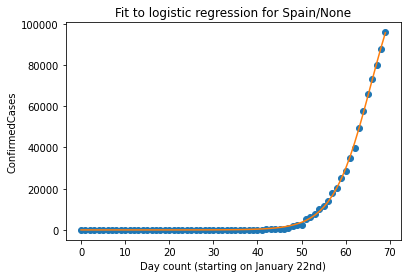

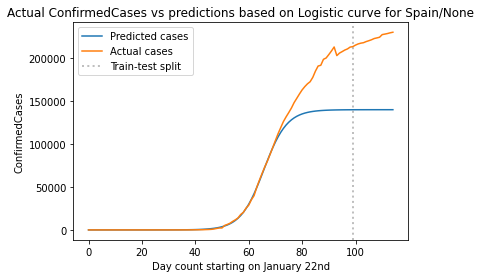

In [177]:
def logistic_function(x, a, b, c, d):
    return a / (1. + np.exp(-c * (x - d))) + b

def fit_logistic(all_data, country_name, province_name, train_lim, target):
    data_cp = all_data.loc[(all_data['Country_Region']==country_dict[country_name]) & (all_data['Province_State']==province_dict[province_name])]
    y = data_cp.loc[(data_cp['Day_num'])<=train_lim, target].astype(np.int32)
    x = list(range(0, len(y)))

    # Initial guess
    p0 = [0,1,1,0]

    (a_, b_, c_, d_), cov = optimize.curve_fit(logistic_function, x, y, bounds=(0, [500000., 10., 1000., 1000., ]), p0=p0, maxfev=10**9)
    y_fit = logistic_function(x, a_, b_, c_, d_)
    
    return x, y, y_fit, (a_, b_, c_, d_), cov

def plot_logistic(x, y, y_fit, country_name, province_name, target):
    fig, ax = plt.subplots(1, 1, figsize=(6, 4))
    ax.plot(x, y, 'o')
    ax.plot(x, y_fit, '-')
    ax.set_xlabel("Day count (starting on January 22nd)")
    ax.set_ylabel(target)
    ax.set_title("Fit to logistic regression for "+ country_name+"/"+province_name)
    

def plot_logistic_country(all_data, train, dates_overlap, country_name, province_name, valid_num, target, x, a_, b_, c_, d_):
    forecast = logistic_function(list(range(len(x)+60)), a_, b_, c_, d_)
    df_train = train.loc[(train['Country_Region']==country_name) & (train['Province_State']==province_name), target]
    df_fcst = forecast[:len(df_train)]
    dates = list(range(0,len(df_train)))
    
    # Plot results
    fig, (ax1) = plt.subplots(1, 1, figsize=(6,4))
    ax1.plot(dates, df_fcst)
    ax1.plot(dates, df_train)
    ax1.axvline(len(df_train)-valid_num-1, linewidth=2, ls = ':', color='grey', alpha=0.5)
    ax1.set_title("Actual ConfirmedCases vs predictions based on Logistic curve for "+country_name + "/"+province_name)
    ax1.legend(['Predicted cases', 'Actual cases', 'Train-test split'], loc='upper left')
    ax1.set_xlabel("Day count starting on January 22nd")
    ax1.set_ylabel("ConfirmedCases")


# Fit country to logistic curve
country_name = 'Spain'
province_name = 'None'
train_lim = 69
valid_lim = 84 # needs to be changed as more days of training data are included
test_lim = 112
valid_num=valid_lim-train_lim 

x, y, y_fit, (a_, b_, c_, d_), cov = fit_logistic(all_data, country_name, province_name, train_lim, 'ConfirmedCases')
plot_logistic(x, y, y_fit, country_name, province_name, 'ConfirmedCases')
plot_logistic_country(all_data, train, dates_overlap, country_name, province_name, valid_num, 'ConfirmedCases', x, a_, b_, c_, d_)




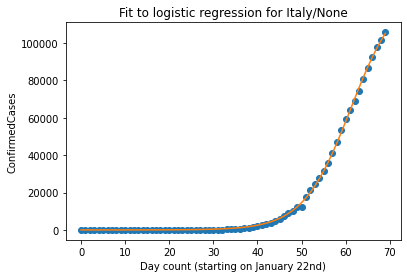

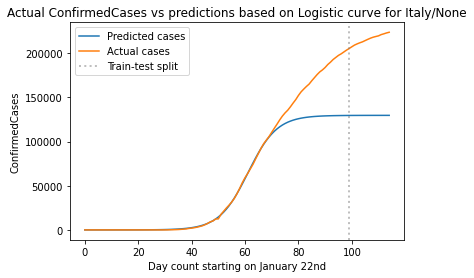

In [178]:
# Fit country to logistic curve
country_name = 'Italy'
province_name = 'None'
x, y, y_fit, (a_, b_, c_, d_), cov = fit_logistic(all_data, country_name, province_name, train_lim, 'ConfirmedCases')
plot_logistic(x, y, y_fit, country_name, province_name, 'ConfirmedCases')
plot_logistic_country(all_data, train, dates_overlap, country_name, province_name, valid_num, 'ConfirmedCases', x, a_, b_, c_, d_)

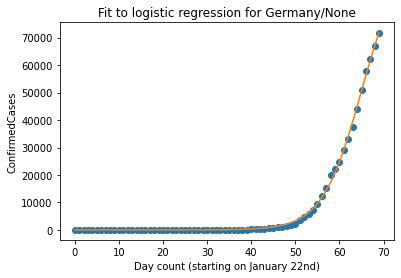

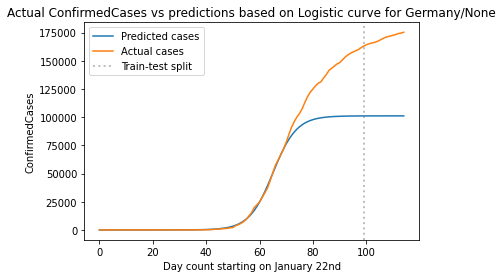

In [179]:
# Fit country to logistic curve
country_name = 'Germany'
province_name = 'None'
x, y, y_fit, (a_, b_, c_, d_), cov = fit_logistic(all_data, country_name, province_name, train_lim, 'ConfirmedCases')
plot_logistic(x, y, y_fit, country_name, province_name, 'ConfirmedCases')
plot_logistic_country(all_data, train, dates_overlap, country_name, province_name, valid_num, 'ConfirmedCases', x, a_, b_, c_, d_)

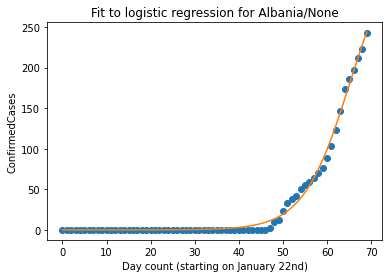

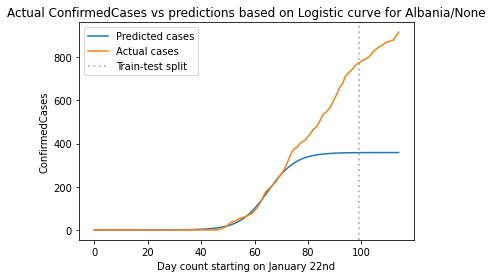

In [180]:
# Fit country to logistic curve
country_name = 'Albania'
province_name = 'None'
x, y, y_fit, (a_, b_, c_, d_), cov = fit_logistic(all_data, country_name, province_name, train_lim, 'ConfirmedCases')
plot_logistic(x, y, y_fit, country_name, province_name, 'ConfirmedCases')
plot_logistic_country(all_data, train, dates_overlap, country_name, province_name, valid_num, 'ConfirmedCases', x, a_, b_, c_, d_)

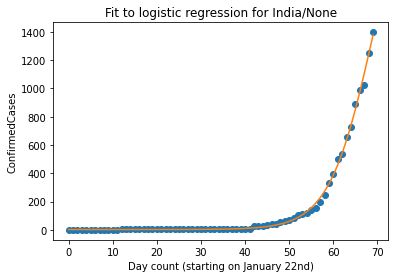

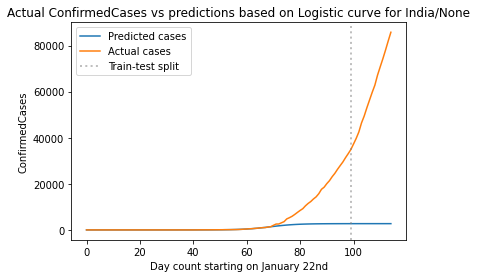

In [181]:
# Fit country to logistic curve
country_name = 'India'
province_name = 'None'
x, y, y_fit, (a_, b_, c_, d_), cov = fit_logistic(all_data, country_name, province_name, train_lim, 'ConfirmedCases')
plot_logistic(x, y, y_fit, country_name, province_name, 'ConfirmedCases')
plot_logistic_country(all_data, train, dates_overlap, country_name, province_name, valid_num, 'ConfirmedCases', x, a_, b_, c_, d_)

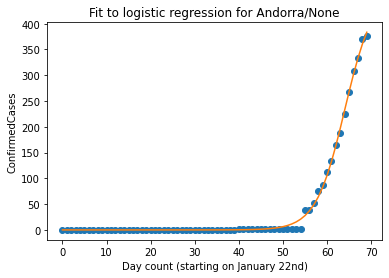

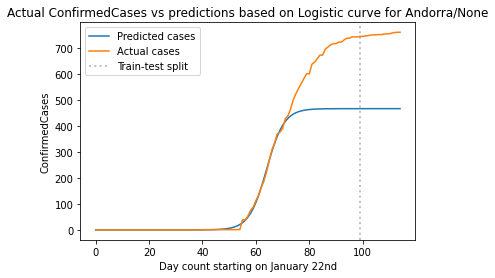

In [182]:
# Fit country to logistic curve
country_name = 'Andorra'
province_name = 'None'
x, y, y_fit, (a_, b_, c_, d_), cov = fit_logistic(all_data, country_name, province_name, train_lim, 'ConfirmedCases')
plot_logistic(x, y, y_fit, country_name, province_name, 'ConfirmedCases')
plot_logistic_country(all_data, train, dates_overlap, country_name, province_name, valid_num, 'ConfirmedCases', x, a_, b_, c_, d_)

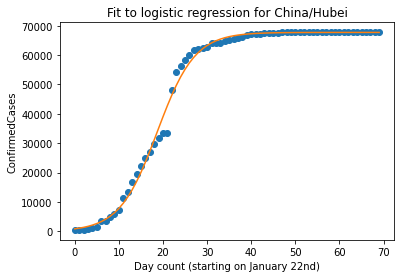

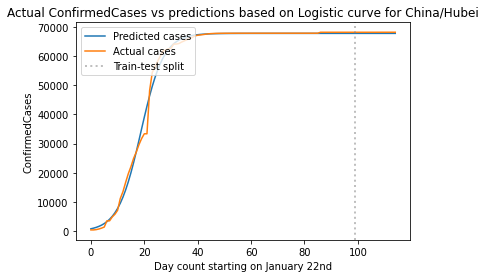

In [183]:
# Fit country to logistic curve
country_name = 'China'
province_name = 'Hubei'
x, y, y_fit, (a_, b_, c_, d_), cov = fit_logistic(all_data, country_name, province_name, train_lim, 'ConfirmedCases')
plot_logistic(x, y, y_fit, country_name, province_name, 'ConfirmedCases')
plot_logistic_country(all_data, train, dates_overlap, country_name, province_name, valid_num, 'ConfirmedCases', x, a_, b_, c_, d_)

**Logistic curve for all countries**

In [189]:
# train_lim = 69
# test_lim = 112

# def logistic_forecast_allcountries(all_data, train, train_lim, test_lim):
    
#     ts = time.time()
#     data_pred = all_data[all_data.ForecastId != -1][['Country_Region', 'Province_State', 'Day_num', 'ForecastId']]
#     data_pred['Predicted_ConfirmedCases'] = [0]*len(data_pred)
#     data_pred['Predicted_Fatalities'] = [0]*len(data_pred)

#     # Main loop for countries
#     for country_name in train['Country_Region'].unique():
#         for province_name in train[train['Country_Region']==country_name]['Province_State'].unique():
            
#             # ConfirmedCases
#             x, y, y_fit, (a_, b_, c_, d_), cov = fit_logistic(all_data, country_name, province_name, train_lim, 'ConfirmedCases')
#             pred_1 = [logistic_function(t, a_, b_, c_, d_) for t in list(range(train_lim+1, test_lim+1))]
#             data_pred.loc[((data_pred['Country_Region']==country_dict[country_name]) & (data_pred['Province_State']==province_dict[province_name])), 'Predicted_ConfirmedCases'] = pred_1

#             # Fatalities
#             x, y, y_fit, (a_, b_, c_, d_), cov = fit_logistic(all_data, country_name, province_name, train_lim, 'Fatalities')
#             pred_2 = [logistic_function(t, a_, b_, c_, d_) for t in list(range(train_lim+1, test_lim+1))]
#             data_pred.loc[((data_pred['Country_Region']==country_dict[country_name]) & (data_pred['Province_State']==province_dict[province_name])), 'Predicted_Fatalities'] = pred_2


#     print("Logistic function fit for all countries finished in ", round(time.time() - ts, 2), " seconds")
#     return data_pred
    
# logistic_forecast = logistic_forecast_allcountries(all_data, train, train_lim, test_lim) 
# get_submission(logistic_forecast, 'Predicted_ConfirmedCases', 'Predicted_Fatalities')

**ARIMA**

In [185]:
!pip install pyramid.arima
from pyramid.arima import auto_arima

     |████████████████████████████████| 604kB 5.0MB/s 


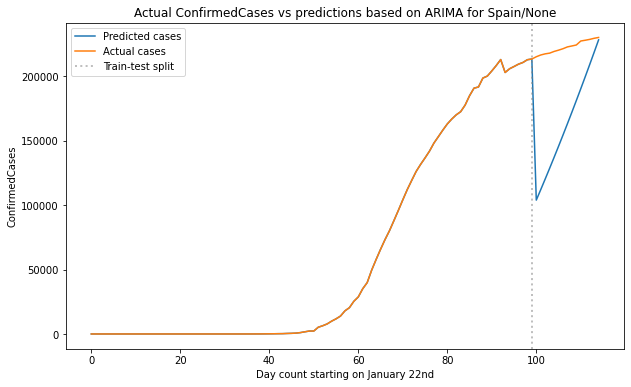

In [186]:
# Define a general function to run ARIMA regression
def arima_cp(all_data, country_name, province_name, target, train_lim, test_lim):
    
    #Select data for the Country_Region, splitting train/test days
    data_cp = all_data.loc[(all_data['Country_Region']==country_dict[country_name]) & (all_data['Province_State']==province_dict[province_name])]
    data_cp_train = data_cp.loc[(data_cp['Day_num'])<=train_lim, target].astype(np.int32)
    data_cp_test = data_cp.loc[(data_cp['Day_num'])>test_lim, target].astype(np.int32)

    # Set the range of parameters to use
    stepwise_model = auto_arima(data_cp[target], start_p=1, start_q=1, max_p=30, max_q=30, 
                                start_P=0, seasonal=False, d=2, trace=False, error_action='ignore', stepwise=True)

    # Train and predict
    stepwise_model.fit(data_cp_train, start_ar_lags=2*max(30, 30))
    forecast = stepwise_model.predict(n_periods=test_lim-train_lim)
    return forecast


# Plot the actual values vs predictions
def plot_arima_country(all_data, train, forecast, dates_overlap, country_name, province_name, valid_num, target):
    df_train = train.loc[(train['Country_Region']==country_name) & (train['Province_State']==province_name), target]
    df_fcst = np.append(df_train[:-valid_num], forecast[:valid_num])
    dates = list(range(0,len(df_train)))
    
    # Plot results
    fig, (ax1) = plt.subplots(1, 1, figsize=(10,6))
    ax1.plot(dates, df_fcst)
    ax1.plot(dates, df_train)
    ax1.axvline(len(df_train)-valid_num-1, linewidth=2, ls = ':', color='grey', alpha=0.5)
    ax1.set_title("Actual ConfirmedCases vs predictions based on ARIMA for "+country_name + "/"+province_name)
    ax1.legend(['Predicted cases', 'Actual cases', 'Train-test split'], loc='upper left')
    ax1.set_xlabel("Day count starting on January 22nd")
    ax1.set_ylabel("ConfirmedCases")
    
    
    
# Inputs
country_name = 'Spain'
province_name = 'None'

forecast = arima_cp(all_data, country_name, province_name, 'ConfirmedCases', train_lim, test_lim)
plot_arima_country(all_data, train, forecast, dates_overlap, country_name, province_name, valid_num, 'ConfirmedCases')


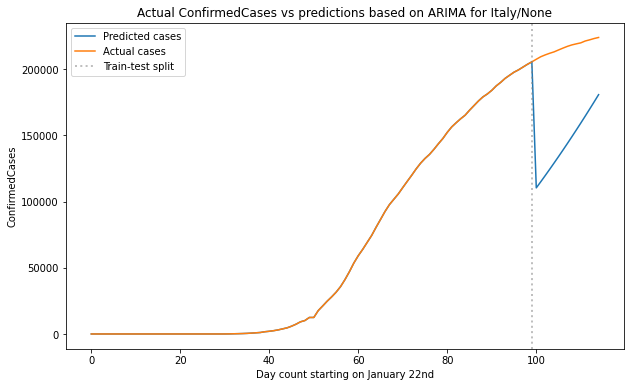

In [187]:
country_name = 'Italy'
province_name = 'None'

forecast = arima_cp(all_data, country_name, province_name, 'ConfirmedCases', train_lim, test_lim)
plot_arima_country(all_data, train, forecast, dates_overlap, country_name, province_name, valid_num, 'ConfirmedCases')


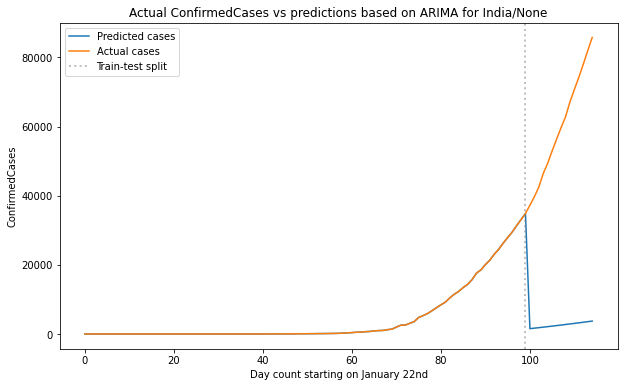

In [190]:
country_name = 'India'
province_name = 'None'

forecast = arima_cp(all_data, country_name, province_name, 'ConfirmedCases', train_lim, test_lim)
plot_arima_country(all_data, train, forecast, dates_overlap, country_name, province_name, valid_num, 'ConfirmedCases')